In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

sub_data=pd.read_csv("subscribers.csv")

In [2]:
profile = ProfileReport(sub_data)
profile.to_file("Report.html")

In [3]:
sub_data.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [4]:
data1 = sub_data[['package_type','preferred_genre', 'intended_use', 'weekly_consumption_hour','op_sys',
                 'attribution_technical', 'attribution_survey','months_per_bill_period','male_TF','age',
                 'plan_type','trial_completed','current_sub_TF'
                 ]]

In [5]:
data1 = data1[data1.age<100]
data1 = data1[data1.age>10]
data1 = data1[data1.weekly_consumption_hour>0]
data1.dropna(inplace=True)

In [6]:
data2 = pd.get_dummies(data=data1, columns=['package_type', 'preferred_genre',
                                                    'intended_use', 'plan_type', 
                                                    'attribution_technical','attribution_survey','op_sys'])
data2

,weekly_consumption_hour,months_per_bill_period,male_TF,age,trial_completed,current_sub_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,...,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS
2,36.001186,4,True,25.0,True,False,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,20.051667,4,False,30.0,True,False,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,22.951579,4,False,28.0,True,True,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,20.051667,4,False,61.0,True,True,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7,34.551230,4,False,23.0,True,True,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,4,False,43.0,True,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227623,28.751405,4,False,38.0,True,True,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
227624,27.301448,4,False,49.0,True,True,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
227625,31.651317,4,False,45.0,True,True,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


1 : 7.166351262643465
2 : 6.997693316131173
3 : 6.908942446649147
4 : 6.823649630101622
5 : 6.8025117712502645
6 : 6.750658782758883
7 : 6.683745839718794
8 : 6.612860558857949
9 : 6.530166698337696
10 : 6.438217152307917
11 : 6.373848024386639
12 : 6.3011705355406775
13 : 6.3033936855104225
14 : 6.267697017010155


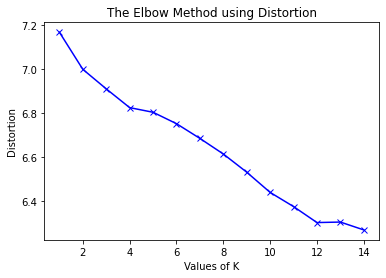

[10904403.999999855, 10613451.29908017, 10453701.299925601, 10313986.798636276, 10119991.10295217, 9878406.983743884, 9717757.45616578, 9574107.172595883, 9424215.87718545, 9277748.444860881, 9099978.616169179, 8974380.118034903, 8817365.656412676, 8673798.290290402]


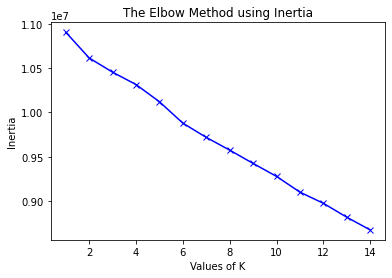

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist 
scaler = StandardScaler()
scaled = scaler.fit_transform(data2.values)
df = pd.DataFrame(scaled)
inertias = []
distortions = []
mapping1 = {} 
mapping2 = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=2000)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / df.shape[0])
    mapping1[k] = sum(np.min(cdist(df, kmeans.cluster_centers_, 
                 'euclidean'),axis=1)) / df.shape[0] 
    mapping2[k] = kmeans.inertia_ 
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))  
K=range(1,15)
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()     

print(inertias)

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [15]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=2000)
y_pred = kmeans.fit_predict(df)
y_pred = list(y_pred)

data1['cluster'] = y_pred
data1.to_csv('labeled.csv')